# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [48]:
!pip install palmerpenguins

import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()

In [49]:
penguins_clean = load_penguins().dropna()

y = penguins_clean['species'].astype('category').cat.codes

X_raw = penguins_clean.drop('species', axis=1)

X = pd.get_dummies(X_raw, drop_first=True, dtype=int)

penguins = X

penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,0,1,1
1,39.5,17.4,186.0,3800.0,2007,0,1,0
2,40.3,18.0,195.0,3250.0,2007,0,1,0
4,36.7,19.3,193.0,3450.0,2007,0,1,0
5,39.3,20.6,190.0,3650.0,2007,0,1,1
...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,1,0,1
340,43.5,18.1,202.0,3400.0,2009,1,0,0
341,49.6,18.2,193.0,3775.0,2009,1,0,1
342,50.8,19.0,210.0,4100.0,2009,1,0,1


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [50]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from plotnine import ggplot, aes, geom_line, geom_abline, labs, theme_minimal, ggtitle
import pandas as pd

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=342, stratify=y)

KNN 3 and KNN 9

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn3 = KNeighborsClassifier(n_neighbors=3).fit(X_train_scaled, y_train)
knn9 = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

pred_knn3 = knn3.predict(X_test_scaled)
pred_knn9 = knn9.predict(X_test_scaled)
prob_knn3 = knn3.predict_proba(X_test_scaled)
prob_knn9 = knn9.predict_proba(X_test_scaled)

cm_3 = confusion_matrix(y_test, pred_knn3)
cm_9 = confusion_matrix(y_test, pred_knn9)

print(cm_3)
print(cm_9)

[[44  0  0]
 [ 1 19  0]
 [ 0  0 36]]
[[44  0  0]
 [ 0 20  0]
 [ 0  0 36]]


Decision Trees

In [58]:
dt1 = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X_train, y_train)
dt_full = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

y_pred_dt3 = dt1.predict(X_test)
y_pred_dt_full = dt_full.predict(X_test)
y_proba_dt3 = dt1.predict_proba(X_test)
y_proba_dt_full = dt_full.predict_proba(X_test)

dt_cm_3 = confusion_matrix(y_test, y_pred_dt3)
dt_cm_full = confusion_matrix(y_test, y_pred_dt_full)

print(dt_cm_3)
print(dt_cm_full)

[[44  0  0]
 [ 3 17  0]
 [ 2  0 34]]
[[44  0  0]
 [ 1 19  0]
 [ 2  0 34]]


ROC Plot

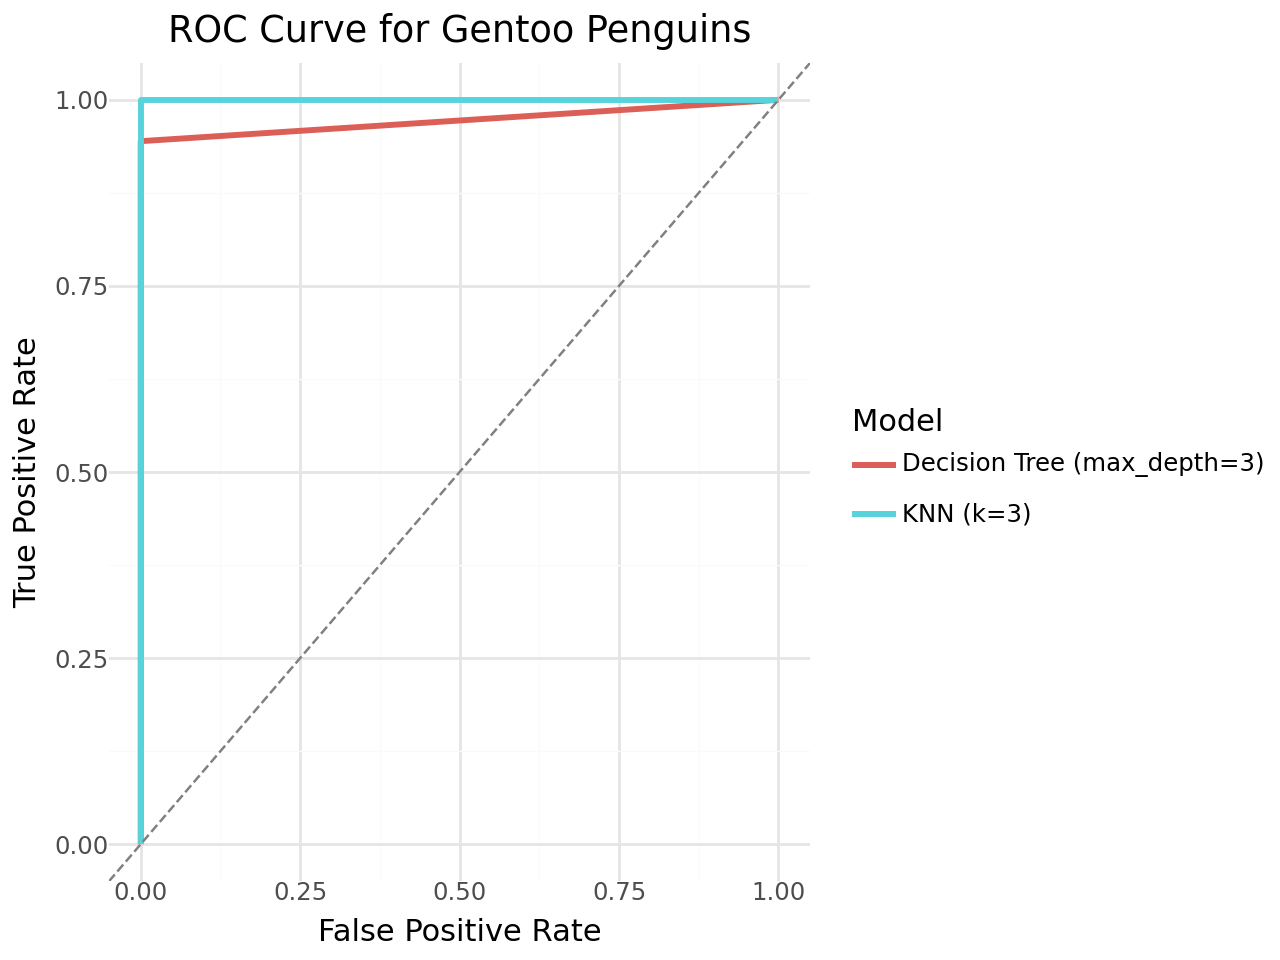

In [60]:
unique_classes = sorted(y.unique())
y_test_binarized = label_binarize(y_test, classes=unique_classes)

species_idx = 2
fpr_knn3, tpr_knn3, _ = roc_curve(y_test_binarized[:, species_idx], y_proba_knn3[:, species_idx])
fpr_dt3, tpr_dt3, _ = roc_curve(y_test_binarized[:, species_idx], y_proba_dt3[:, species_idx])

roc_df = pd.DataFrame({
    'FPR': list(fpr_knn3) + list(fpr_dt3),
    'TPR': list(tpr_knn3) + list(tpr_dt3),
    'Model': ['KNN (k=3)'] * len(fpr_knn3) + ['Decision Tree (max_depth=3)'] * len(fpr_dt3)
})

(
    ggplot(roc_df, aes(x='FPR', y='TPR', color='Model'))
    + geom_line(size=1.2)
    + geom_abline(linetype='dashed', color='gray')
    + labs(title='ROC Curve for Gentoo Penguins', x='False Positive Rate', y='True Positive Rate')
    + theme_minimal()
)